In [138]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
import csv

       
with open(r"Apache_2k.log") as in_file, open('Apache_2k.csv', 'w') as out_file:
    # or 'wb' if on python2
#   writer = csv.writer(f2)
#   writer.writerow(['Index', 'A'])

    writer = csv.writer(out_file)
    writer.writerow(['week','month','day','time','year','type','comments'])

    for line in in_file:
        columns = line[:-1].split(' ')
        columns[6] = ' '.join(columns[6:])
        writer.writerow(columns[:7])

#og_data = pd.read_csv('../Downloads/Apache_2k.csv')


In [ ]:
import pandas as pd
file = open('Apache_2k.log')
lines = file.readlines()

#del df
for line in lines:
    columns = line[:-1].split(' ')
    columns[6] = ' '.join(columns[6:])
    columns[6] = columns[6].split(" ", 1)
    Temp = pd.DataFrame({"Date & Time": [str(",".join(columns[:5]))], "Type of Message":[str(columns[5])], 'Function': [str(columns[6][0])] ,'Message': [str(columns[6][1])]}) 
    try:
        df   
    except NameError:
        df = Temp
    else:
        df = df.append(Temp, ignore_index='True')



In [153]:
df.head()

Date & Time          Function  \
0  [Sun,Dec,04,04:47:44,2005]  workerEnv.init()   
1  [Sun,Dec,04,04:47:44,2005]            mod_jk   
2  [Sun,Dec,04,04:51:08,2005]        jk2_init()   
3  [Sun,Dec,04,04:51:09,2005]        jk2_init()   
4  [Sun,Dec,04,04:51:09,2005]        jk2_init()   

                                  Message Type of Message  message_code  
0  ok /etc/httpd/conf/workers2.properties        [notice]           1.0  
1        child workerEnv in error state 6         [error]           0.0  
2  Found child 6725 in scoreboard slot 10        [notice]           1.0  
3   Found child 6726 in scoreboard slot 8        [notice]           1.0  
4   Found child 6728 in scoreboard slot 6        [notice]           1.0

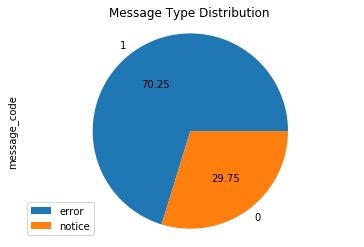

In [151]:
df['message_code'] = 0 

df.loc[(df['Type of Message'] == '[notice]'), 'message_code'] = 1

message_type = (df['message_code']).value_counts().plot(kind='pie',autopct ='%.2f').axis('equal')
labels = [r'error', r'notice']
#df['Type of Message'].unique()
#plt.pie(df['message_code'])
plt.legend(labels,loc=3)
plt.title('Message Type Distribution')
plt.show()


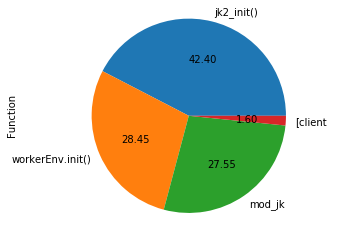

In [150]:
#df.head()
#Error Message Analysis
errors = df[df['Type of Message'] == '[error]']

error_type = (df['Function']).value_counts().plot(kind='pie',autopct='%.2f').axis('equal')

